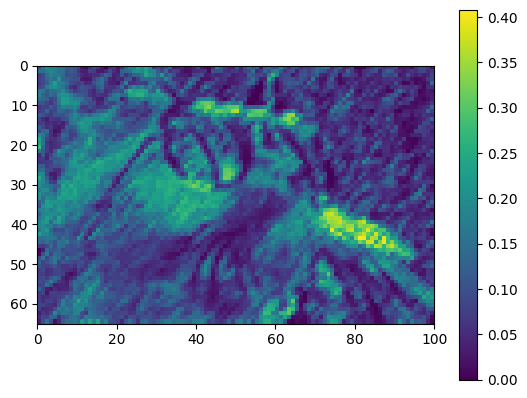

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image
image = cv2.imread('E:/python/Images for opencv/Cat image.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show original Image
cv2.imshow('Input Image', image)
cv2.waitKey(0)

# HOG Parameters
cell_size = (8, 8)  # Size of a cell in pixels
block_size = (2, 2)  # Number of cells in a block
nbins = 9  # Number of orientation bins

# Compute the HOG Descriptor
hog = cv2.HOGDescriptor(
    _winSize=(gray.shape[1] // cell_size[1] * cell_size[1], 
              gray.shape[0] // cell_size[0] * cell_size[0]),
    _blockSize=(block_size[1] * cell_size[1], block_size[0] * cell_size[0]), 
    _blockStride=(cell_size[1], cell_size[0]), 
    _cellSize=(cell_size[1], cell_size[0]), 
    _nbins=nbins
)

# Compute HOG features
n_cells = (gray.shape[0] // cell_size[0], gray.shape[1] // cell_size[1])
hog_feats = hog.compute(gray).reshape(
    n_cells[1] - block_size[1] + 1, n_cells[0] - block_size[0] + 1,
    block_size[0], block_size[1], nbins
).transpose((1, 0, 2, 3, 4))

# Initialize gradient arrays
gradients = np.zeros((n_cells[0], n_cells[1], nbins))
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

# Block normalization
for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += hog_feats[:, :, off_y, off_x, :]
        
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

# Avoid division by zero
cell_count[cell_count == 0] = 1
gradients /= cell_count

# Plot HOG Features
color_bins = 5
plt.pcolor(gradients[:, :, color_bins])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

cv2.destroyAllWindows()
